## Comentario sobre problema de Román

Vimos mi forma de resolver el problema, pero no vimos aún la forma de Román, que debo decir, es mucho más lista. Ya les había dicho, casi siempre hay una forma talachuda y "segura" y una forma lista de resolver los problemas en probabilidad. Yo me fui por la forma talachuda, Román por la lista, así que respect! 

Dejenme primero poner la forma que yo obtuve explícitamente: 



$P(color) = 4 \frac{\sum_{i = 5}^{13} \binom{13}{i} \binom{39}{15-i}}{\binom{52}{15}} -  \frac{6\sum_{j = 5}^{15-i}\sum_{i = 5}^{10} {\binom{13}{i}\binom{13}{j}\binom{26}{15-i-j}}}{\binom{52}{15}} +\frac{4\binom{13}{5}\binom{13}{5}\binom{13}{5}}{\binom{52}{15}}$


Es una suma con 4 miembros, dos de los cuales son sumas y una de esas sumas es doble, así que es larguísimo. Román lo hizo vía el complemento: 

### Solución vía complemento

Es decir, calculó la probabilidad de que no se forme un color y notó que hay sólo 4 posibilidades en ese caso, 4 cartas de un palo, 4 cartas de otro, 4 más de otro y 3 de un último palo. No puede haber menos cartas de uno de los palos, porque implicaría aumentar en alguno de los palos y formaría un color. Si se reduce el 3, pasaría a aumentar un 4, lo que implica que se forma un color. Si se reduce uno de los que tiene 4, pasa lo mismo, a menos que se reduzca en una carta y esa se sume al bonche con 3 cartas, pero en ese caso otra vez se tiene una configuración de 4,4,4,3. Hay 4 configuraciones de este tipo. 3444, 43444,4434 y 4443. Luego, cada conjunto de 3 o 4 cartas tiene un númbero de combinaciones de $n$ de entre $13$ cartas posibles, correspondientes al palo, con $n = 3$ o $= 4$. 

Además, como ya habíamos calculado, el número de configuraciones totales es $\binom{52}{15}$, así que la probabilidad del complemento es: 

$P(color^c) = \frac{4\binom{13}{4}^3 \binom{13}{3}}{\binom{52}{15}} = \frac{4 13!^4 15! 37!}{4!^3 9!^3 3! 10! 52!} = \frac{15! 37! 13!^4}{4!^2 9!^3 3!^2 10! 52!}   $

Lo que implica que la probabilidad de sacar color es: 

$1-\frac{13!^4 15! 37!}{3!^2 4!^2 9!^3 10!}$

In [191]:
1- factorial(big(13))^4 * factorial(15) * factorial(big(37))/(factorial(4)^2 * factorial(3)^2 * factorial(big(9))^3 * factorial(10)* factorial(big(52)))

0.9066891292916342052200403703664554994770142178269562468692436041677640786521127

Que pueden ver que es el mismo valor que habíamos obtenido, osea, sí es el valor correcto! 

Ahora bien, podemos sacar un poco más de jugo a este problema. Con ambos métodos llegamos al mismo resultado, pero en diferente presentación. O sea, podemos igualar ambos resultados. Por ahora es una suma muy particular, pero podríamos generalizar la idea ¿cierto? 


$4 \sum_{i = 5}^{13} \binom{13}{i} \binom{39}{15-i} -  6\sum_{j = 5}^{15-i}\sum_{i = 5}^{10} {\binom{13}{i}\binom{13}{j}\binom{26}{15-i-j}} +4\binom{13}{5}\binom{13}{5}\binom{13}{5} = \binom{52}{15}- 4\binom{13}{4}^3 \binom{13}{3} $

Se puede buscar sustituir los números que fijamos, 13 (cartas por palo), 15 (cartas en la mano), 4 (palos) y 5 (cartas para formar color), por algo más general, con la regla de que haya una única forma de no hacer color y tendremos una fórmula general de una suma complicada que se reduzca a un cálculo más sencillo. 

Esto suena inútil, pero haciendo esta clase de cosas, "por suerte" se han encontrado muchas series que facilitan los cálculos de muchos tipos, incluidas estrarategias para calcular $\pi$ extremadamente eficiente. 

Para terminar el comentario, otra vez, respect! Y aviso, Román ha resuelto 2 problemas que me han impresionado, así que en el examen todos tendrán que resolver 8 problemas, él sólo 4 de esos 8 (Estarán marcados con asterisco en el examen), los otros 4 estarán ya contados como correctos. 

Inpresiónenenme, regalo puntos al por mayor. 

Ahora sí, pasemos a lo que me interesa ver, que son los caminantes aleatorios. Antes, para darle cierta formalidad, necesito definir qué es una variable aleatoria. 

# Variables Aleatorias

Ya hemos estado usando variables aleatorias sin definirlas. Por ejemplo:

In [193]:
rand()

0.797983605360162

Pero conviene aclarar qué es. 

Las variables aleatorias serán nuestra forma de transformar los resultados de un experimento en números reales. Aquí debo decir que la parte de "números reales", se puede omitir, porque podemos asociar los resultados de un experimento a un vector, un número complejo, un cuaternión, una matriz, etc. Y utilizaremos las versiones donde se les asocian todas estas versiones, pero todas esas versiones también se pueden reducir a reales acomodados en diferentes formatos, así que nos restringiremos a los reales por ahora. 

Una variable real, es un número real cualquiera y que podemos fijar. Por ejemplo, si $x$ es una variable real, puede tener cualquier valor entre los números reales, pero si es parte de una ecuación $x -2 = 0$, sabemos que $x$ es en realidad el número $2$. También, en una función que toma como argumento $x$, podemos evaluar la función y obtener un valor concreto, por ejemplo $f(x) = x^2, podemos evaluar $f(2) = 4$. 

In [196]:
 f(x) = x^2
f(2)

4

En el caso de las variables aleatorias, quisieramos que fueran algo así como variables reales, pero que nosotros no podamos fijar el valor, sino que se "elijan solas" aleatoriamente.  

En vez de que se "elijan" solas, utilizamos los resultados de un experimento (que es la parte aleatoria) y lo incertamos en una función que va del espacio de muestreo a los reales. La variable aleatoria no incluye el experimento, es sólo la función que relaciona el espacio de muestreo con los números reales. 

**Variable Aleatoria** Función que va del espacio de muestreo $\Omega$ a los reales.

$$X: \Omega \rightarrow \mathbb{R}$$

No hay en realidad nada de aleatorio en la definición. Les llamamos así, porque en general usamos experimentos que arrojan resultados aleatorios para evaluarlas, o bien funciones suficientemente complicadas (como en el caso de rand() de Julia), como para que no podamos estimar qué saldrá, pero de hecho pueden ser 100% determinísticas. 

Así que las variables aleatorias, ni son variables (son funciones), ni son aleatorias (son deterministas). Pero nos ayudan a entender los resultados de un experimento. 

Como dijimos, la variable aleatoria de rand(), por ejemplo, en realidad es una función sofisticada aplicada al tiempo en nanosegundos desde la creación del lenguaje C. Pero $f(x)$, es también una variable aleatoria que va del conjunto de los reales a los reales. También, la función que asocie $1$ a un sol y $0$ a un águila en un volado, será una variable aleatoria. No tiene nada de aleatoria, porque yo puedo forzar a que salga sol o salga águila y por lo tanto forzar el resultado. 

Lo importante de las varables aleatorias es que nos ayudarán a analizar los resultados de un experimento. Por ejemplo, con la variable aleatoria de los volados, puedo contar cuántos soles salen en $n$ volados. De forma general, esa variable aleatoria se llama la función indicatriz $I_A$, y asocia a un subconunto del espacio de muestreo $A$ con $1$ y al resto le asocia $0$ y sirve justo para contar con qué frecuencia sucede el evento $A$, pues si $I_A$ es nuestra variable indicatriz, $P(I_A = 1)$ nos dirá la frecuencia con la que ocurre $A$.  

Aquí quiero hacer una aclaración sobre la notación. En general si $X$ es una variable aleatoria, la escribiré con mayúscula y con minúscula si es una variable típica (excepto en Julia, en Julia todas las variables o funciones serán en minúscula). Además, diré que una variable aleatoria es igual a $x$, si el resultado de evaluar la variable en un elemento del espacio de muestreo es $x$. 

Por lo tanto: 



$p_X(x) = P(X=x) = P(\{\omega \in \Omega : X(\omega) = x\})$

$P(I_A = 1) = P(\{\omega \in \Omega: I_A(\omega) = 1\}) = P(\{\omega \in \Omega:\omega \in A\})$ 

Y así para cualquier relación lógica, es decir, $>, \ge, <, \le, \in, \dots$. 

Aclarado esto, déjenme definir 2 tipos de variables aleatorias que utilizaremos bastante. Las variables aleatorias discretas y las continuas. 

**Variable Aleatoria Discreta** Es aquella donde existe un conjunto numerable $K$ tal que $P(X \in K) = 1$. 

En contraste, una variable aleatoria continua la vamos a definir como: 

**Variable Aleatoria Continua** es aquella donde para tod $x \in \mathbb{R}$, $P(X = x) = 0$. 

Como vimos antes, esto nos obliga a tener conjuntos no numerables. 

Estos no son todos los tipos, también puede haber algunos donde hay un conjunto numerable de puntos donde la probabilidad es mayor que 0, pero la suma de esas probabilidades es menor que 1. En esos casos podemos tener dos tratamitos, uno es el de separar la variable en dos, la parte discreta y la continua. El otro es usar los reales extendidos, es decir, con $+\infty$ y $-\infty$. Luego veremos como usar esto, pero para los que ya tienen una noción de probabilidad, esto lo vamos a hacer utilizando deltas de Dirac (que son algo así como gaussianas de varianza 0). 

Como nos interesa estudiar el caminate aleatorio, vamos a comenzar con variables discretas. 

## Variables aleatorias discretas

Las variables aleatorias discretas, por definición, tendrán un conjunto numerable donde la probabilidad es diferente de 0. El conjunto de todas esas probabilidades, le vamos a llamar la probabilidad de masa. 

**Probabilidad de masa o distribución** $p_X(x)$ es el conjunto (numerable) de las probabilidades $P(X = x)>0$.  

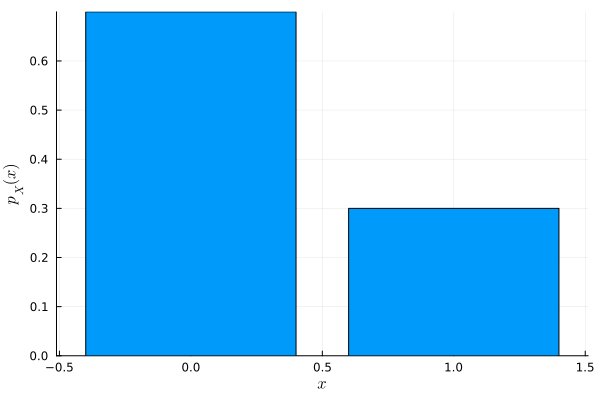

In [67]:
function P(x,p)
    if x == 1
        return p
    elseif x== 0
        return 1-p
    end
end
P_03(x) = P(x,0.3) 
bar([0,1], [P_03.([0,1])], key = false, xlabel = L"x", ylabel = L"p_X(x)")

Noten que estas probabilidades de masa ya no dependen del espacio de muestreo directamente, son funciones que van de los reales al intervalo [0,1] (como se ve en la gráfica). Lo que hace que dos variables aleatorias distintas puedan tener la misma probabilidad de masa.

Por otro lado, con la probabilidad de masa podemos calcular la probabilidad de cualquier subconjunto del contradominio de $X$, pues: 

$P(X \in K) = P(\{\omega\in \Omega: X(\omega) \in K\}) = P(\cup_{x\in K} \{\omega\in \Omega: X(\omega) = x\}) =\sum_{x \in K} P(X = x) = \sum_{x \in K} p_{X}(x)$

Utilizando la función indicatriz, esto nos permite poder calcular la probabilidad de diferentes eventos en diferentes espacios de muestreo de una sola vez. Por ejemplo, moverse a la izquierda o la derecha, es un espacio de muestreo. Tirar solo o águila es otro. Pero en ambos casos puedo calcular con la función indicatriz las probabilidades de sacar $m$ soles o moverme $m$ veces a la derecha. Sé que este ejemplo suena obvio, pero muestra que lo que se haga con variables aleatorias es más general que lo que se hace con el espacio de muestreo directamente. 

Dicho esto, regresemos a los volados. Les recuerdo: 

$P(m \text{ soles en } n \text{ volados}|p) = \binom{n}{m} p^m (1-p)^{n-m}$

Déjenme mostrarles nuevamente cómo se ve la probabilidad de masa de los tiros de Bernoulli

In [198]:
p_binomial(m,n,p) = binomial(n,m)*p^m*(1-p)^(n-m) 

p_binomial (generic function with 1 method)

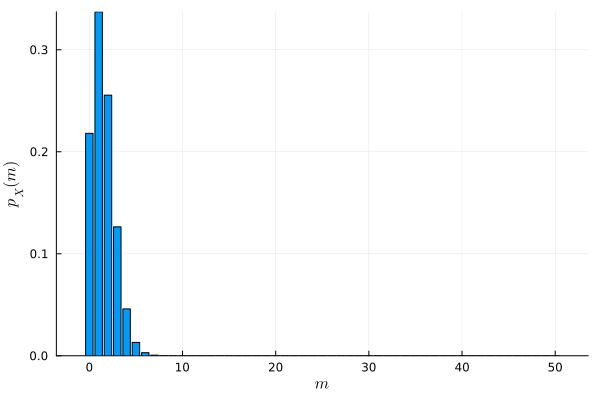

In [207]:
n = 50
p = 0.03
p_X(m) = p_binomial(m,n,p)
bar(0:50, p_X.(0:50), key = false, xlabel = L"m", ylabel = L"p_{X}(m)")

Le puse binomial, porque también se conoce así, como la distribución binomial y la razón es que va multiplicado por el número de combinaciones, que también se conoce como función binomial, que a su vez tiene ese nombre porque aparece en el binomio de Newton. 

En fin, como ya habíamos notado, esto se parece a una Gaussiana, aunque cuando $p$ es muy pequeño o muy cercano a $1$, deja de verse como una gaussiana. ¿A qué se parece en ese caso? y... ¿realmente lo que se genera es una gaussiana? ¿Qué tan rápido?

En lo que sigue vamos a estudiar la distribución binomial en el límite de $n$ muy grande.

Para esto primero necesitamos encontra la forma general de la función. Como ya hemos visto numéricamente, la función tiene un solo máximo. Vamos a demostrar que es así y encontrar dónde está ese máximo. 

Ahora bien, si la función es creciente, $\frac{p_X(m)}{p_X(m-1)}$ será un número mayor que 1. Si es decreciente, entonces será un número menor a 1. El punto donde pasa de ser creciente a decreciente será el máximo. Podríamos derivar, pero derivar factoriales es complicado. 


$$\frac{p_X(m)}{p_X(m-1)} = \frac{\binom{n}{m}p^m (1-p)^{n-m}}{\binom{n}{m-1} p^{m-1} (1-p)^{n+1-m}}$$

$$= \frac{p (n+1-m)}{(1-p) m}$$


Si esto lo hacemos mayor a 1, entonces tendremos que: 

$$\Rightarrow \text{ si } \frac{pn+p-pm}{m-mp} > 1\Rightarrow m< p(n+1)$$

O puesto de otra forma:
 
**Teorema** 

$p_X(m)$ es creciente de $0$ a $\lfloor p(n+1) \rfloor$, después es decreciente. 

Con esto ya tenemos información muy importante, el máximo de nuestra distribución binomial está en $\lfloor p(n+1)\rfloor$. Aquí debo aclarar que si $p(n+1)$ es un entero, entonces la función es creciente sólo hasta un valor menos, $m= p(n+1)-1$, después, en $p_X(m) = p_X(m+1)$ y para valores mayores es decreciente. 

Es un resultado bonito, pero no es de extrañarse, porque $pn$ es el promedio de soles que se pueden tener en $n$ tiros, así que no es raro el resultado, pero igual es útil. Además, mostramos que no hay más picos. 

Dicho esto pasemos a analizar qué sucede cuando $n$ es grande. Aquí el problema son los factoriales. 

$$p_{X}(m)= \binom{n}{m} p^m (1-p)^{n-m} = \frac{n!}{m!(n-m)!} p^m (1-p)^{n-m} $$

Podemos intentar atacar el problema utilizando logaritmos, para transformar los factoriales en sumas. 

$$\log\Big(p_X(m)\Big)= \log(n!) - \log(m!) - \log((n-m)!) + m\log(p) + (n-m)\log(1-p)$$

De aquí, vemos los últimos 2 miembros son fáciles, pues son funciones lineales. Sin embargo, si pasamos los factoriales a sumas, la variable está en el límite superior de la suma y eso es problemático. Para atacar el problema podemos intentar aproximar los factoriales o el logaritmo de los factoriales con alguna función. 


## Aproximación de Stirling

Hay varias versiones de la fórmula de Stirling. La de bolsillo y que será la que más usaremos, es donde sacamos el logaritmo de un factorial. 

Así que aunque no será la versión que utilice hoy, la dejo escrita y les muestro el argumento para llegar a ella. 

$$ \log(n!) = n\log(n) - n - 1$$

Qué tan bien aproxima? 

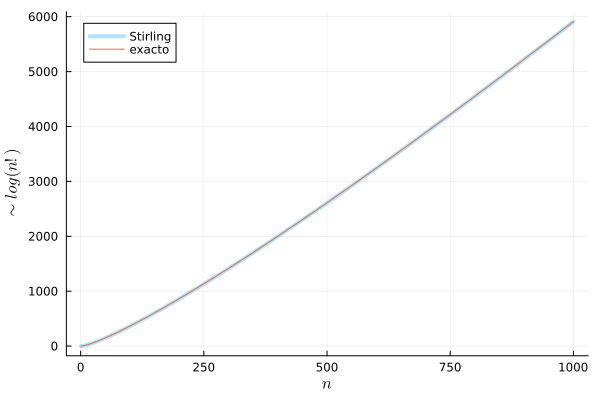

In [208]:
stirling(x) = x*log(x)-x+1

log_factorial(n) = log(factorial(big(n)))

x = 1:1000
plot(x, stirling.(x), label = "Stirling", xlabel = L"n", ylabel =L"\sim log(n!)", lw = 4, alpha = 0.3)
plot!(x, log_factorial.(x), label = "exacto")


Como ven aproxima razonablemente bien, aunque si hacemos zoom sí se ve un error. Vamos a ver una mejor fórmula que esto, pero primero demos argumentos de porque esta fórmula funciona. 

El secreto está en descomponer el factorial en sumas. 

$$\log(n!) =  \sum_{i= 1}^n \log(i) $$

Ahora, escribamos $\int_1^n \log(x) dx$ como una suma de Riemman

$$\int_1^n \log(x) dx = \lim_{k\rightarrow \infty} \frac{(n-1)}{k} \sum_{i = 0}^{k} \log\Big(1+i\cdot\frac{(n-1)}{k}\Big)$$

Pero como $n$ es un número grande, podemos aproximar $k$ con $n-1$ y tendremos: 

$$\int_1^n \log(x) dx \approx \sum_{i = 0}^{n-1}\log(1+i) = \sum_{i = 1}^{n}\log(i)$$

Haciendo la integral tenemos: 

$$\log(n!) = \sum_{i = 1}^{n}\log(i) \approx \int_1^n \log(x) dx = x(\log(x)-1)\Big|_1^n = n\log(n) - n +1$$

En general omitiré el 1, porque $n$ se supondrá muy grande, así que sumarle 1 o no, no tiene efecto para lo que en general ocuparemos esta fórmula.

Quiero aclarar que esto no es una demostración formal, pero es convincente el argumento. porque de hecho no tenemos forma con este método de mejorar la aproximación o de calcular un error con respecto al valor real del logaritmo de $n!. Igual decidí poner esta versión primero, porque es más intuitiva y sí pasa como un argumento heurístico. Además es fácil de memorizarse si omitimos el 1. Como estaremos usandola todo el tiempo, es mejor tener una fórmula fácil aunque no sea tan efectiva. 

Cuando uno da argumentos heurísticos de este tipo, normalmente los acompaña con cálculos numéricos para reforzar el punto. 

┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\ata0k\.julia\packages\PlotUtils\8mrSm\src\ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\ata0k\.julia\packages\PlotUtils\8mrSm\src\ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\ata0k\.julia\packages\PlotUtils\8mrSm\src\ticks.jl:194


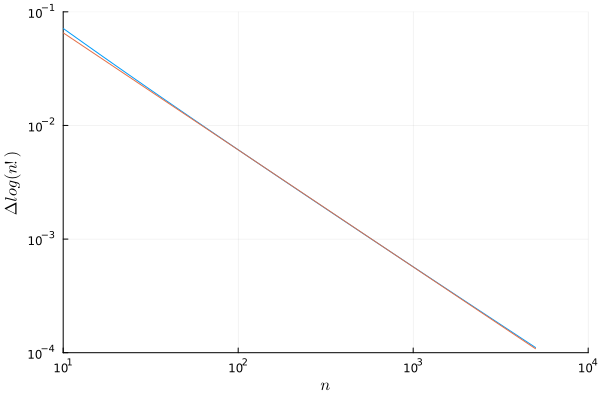

┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\ata0k\.julia\packages\PlotUtils\8mrSm\src\ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\ata0k\.julia\packages\PlotUtils\8mrSm\src\ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\ata0k\.julia\packages\PlotUtils\8mrSm\src\ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\ata0k\.julia\packages\PlotUtils\8mrSm\src\ticks.jl:194


In [209]:
error_stirling(x) = abs(log_factorial(x)-stirling(x))/log_factorial(x)
x = 10:5000
plot(x, error_stirling.(x), key = false, xlabel = L"n", ylabel =L"\Delta log(n!)")
plot!(x, 0.7x.^(-1.03), axis = :log10, xlim = (10, 10_000), ylim = (1e-4, 1e-1))

Por supuesto, no es exacto, pero el error porcentual en el logaritmo cae más o menos como $n^{-1}$ cuando $n$ es suficientemente grande, así que es una fórmula aceptable. 

Ahora vamos a mejorar esta aproximación del factorial. 

Consideremos la función $\Gamma$:

$$\Gamma(x+1) = \int_{0}^{\infty} t^x e^{-t} dt$$

Ahora, utilizando integración por partes, obtenemos: 


$u = t^x$, $du = x t^{x-1}dt$

$dv =  e^{-t}dt$, $v = -e^{-t}$

$$= -t^x e^{-t}\Big|_0^\infty + x \int_0^\infty t^{x-1} e^{-t}dt  =  x \int_0^\infty t^{x-1} e^{-t}dt = x\Gamma(x)$$

Y 

$$\Gamma(1) = \int_0^\infty e^{-t}dt = -e^{-t}\Big|_0^\infty = -0 + 1 = 1$$

Es decir, la función $\Gamma(x+1) = x!$ si $x$ es un entero. Con la regla extra de que $0! = 1$. Otra cosa importante es que dado que la integral existe para todos los valores de $x$ y lo que está dentro de la integral es analítico, hace que la función $\Gamma$ sea una función analítica. 

Entonces: 

$$n! = \int_0^\infty t^n e^{-t}dt = \int_0^\infty e^{-t+n\log(t)}dt$$

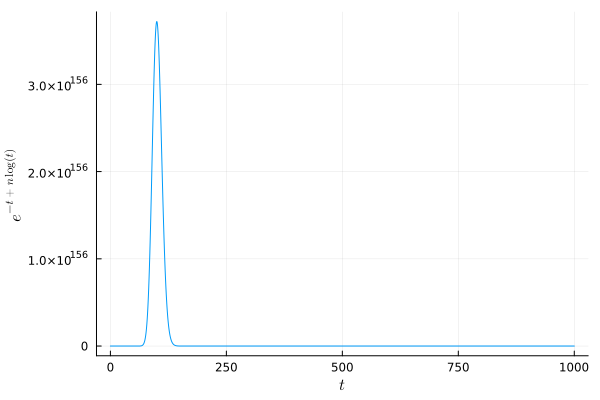

In [210]:
f(t,n= 100) = exp(-t)* t^n
t = 0:0.1:1000    
plot(t, f.(t), key = false, xlabel = L"t", ylabel = L"e^{-t+n\log(t)}")

Veamos cómo se ve la función dentro de la integral

La idea entonces es no integrar sobre los reales positivos, sino, concentrarnos en la zona importante. Para esto vamos a primero encontrar dónde sucede el máximo: 

$$f'(t) = -1 + n/t = 0 \Rightarrow t = n$$

y

$$f''(n) = -n/t^2 = -1/n$$

Así que podemos sustituir aproximadamente lo que  vamos a integrar por: 

$$n! = \int_0^\infty t^n e^{-t}dt \approx \int_0^\infty e^{f(n) + \frac{1}{2}f''(n) (t-n)^2} dt = \int_0^\infty e^{-n +n\log(n) + \frac{-1}{2n} (t-n)^2} dt = n^n e^{-n}\int_0^\infty e^{\frac{-1}{2n} (t-n)^2} dt $$

Haciendo el cambio de variable $x = (t-n)/\sqrt{n}  $, llegamos a la integral de una gaussiana desde $-\sqrt{n}$ hasta $\infty$, multiplicada por $\sqrt{n}$. 

Por otro lado: 

$$\Big(\int_{-\infty}^\infty e^{-x^2 /2} dx\Big)^2 = \int_{-\infty}^\infty \int_{-\infty}^\infty e^{-(x^2 + y^2) /2} dxdy$$

$$\int_0^{2\pi} \int_0^\infty re^{-r^2/2} drd\theta = \int_0^{2\pi} d\theta = 2\pi$$

$$\Rightarrow \int_{-\infty}^\infty e^{-x^2 /2} dx = \sqrt{2\pi}$$

Por lo tanto, sabemos que la integral de una gaussiana es finita y que la mayor contribución se da al rededor del máximo, así que: 

$$n! \approx n^{n+1/2} e^{-n} \int_{-\sqrt{n}}^\infty e^{\frac{1}{2} x^2}dx \approx  n^{n+1/2} e^{-n}\int_{-\infty}^\infty  e^{\frac{1}{2} x^2}dx =  n^{n+1/2} e^{-n} \sqrt{2\pi}$$

Esta es la aproximación fresona de Stirling. Aquí tenemos la ventaja de que tenemos un método para aproximar mejor, que es incrementar el grado del desarrollo de Taylor. 

Para ser estrictos, tendríamos que mostrar el error en ambos pasos de la aproximación que hicimos. El del desarrollo de Taylor se puede calcular (muy talachudamente) utilizando precisamente el error de cortar el desarrollo de Taylor, lo que incrementaría el grado del polinomio dentro de la gaussiana. Después, usando integración por partes, uno puede calcular el error en la medición. El otro error es más difícil de estimar, aunque también es un error más despreciable.

Ahora bien, qué tanto mejor es esta versión? 



┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\ata0k\.julia\packages\PlotUtils\8mrSm\src\ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\ata0k\.julia\packages\PlotUtils\8mrSm\src\ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\ata0k\.julia\packages\PlotUtils\8mrSm\src\ticks.jl:194


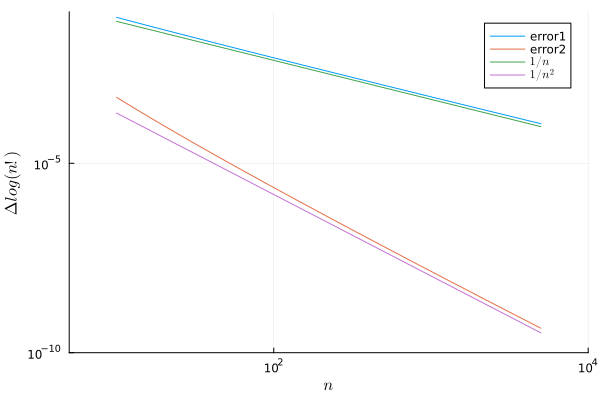

┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\ata0k\.julia\packages\PlotUtils\8mrSm\src\ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\ata0k\.julia\packages\PlotUtils\8mrSm\src\ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\ata0k\.julia\packages\PlotUtils\8mrSm\src\ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\ata0k\.julia\packages\PlotUtils\8mrSm\src\ticks.jl:194


In [211]:
stirling2(n) = log(big(n)^(big(n)+1/2)*exp(-big(n))*sqrt(2*π))

error_stirling(x) = abs(log_factorial(x)-stirling(x))/log_factorial(x)
error_stirling2(x) = abs(log_factorial(x)-stirling2(x))/log_factorial(x)
x = 10:5000
plot(x, error_stirling.(x), label = "error1", xlabel = L"n", ylabel =L"\Delta log(n!)")
plot!(x, error_stirling2.(x), label = "error2", xlabel = L"n", ylabel =L"\Delta log(n!)")
plot!(x, 0.6x.^(-1.03), axis = :log10, xlim = (5, 10_000), label = L"1/n")
plot!(x, 0.03x.^(-2.15), axis = :log10, xlim = (5, 10_000), ylim = (1e-10, 1e-1), label = L"1/n^2")


O sea, la aproximación mejoró en un grado el error. Ahora va como $1/n^2$. Es digna entonces de ser usada para aproximar nuestra distribución binomial. 

Entocnes, sustituiremos todos los factoriales por la fórmula: 



$$p_{X}(m)= \binom{n}{m} p^m (1-p)^{n-m} = \frac{n!}{m!(n-m)!} p^m (1-p)^{n-m} $$

$$=\frac{1}{\sqrt{2\pi}}  \frac{n^{n+1/2} }{m^{m+1/2} (n-m)^{n-m+1/2} } p^m (1-p)^{n-m}$$



$$=\frac{1}{\sqrt{2\pi}}  \frac{n^{n+1/2} }{m^{m+1/2} (n-m)^{n-m+1/2} } p^m q^{n-m}$$

$$=\frac{1}{\sqrt{2\pi} \sqrt{npq}}  \frac{n^{n+1} }{m^{m+1/2} (n-m)^{n-m+1/2} } p^{m+1/2} q^{n-m+1/2}$$

$$=\frac{1}{\sqrt{2\pi npq}}   (np/m)^{m+1/2} (nq/(n-m))^{n-m+1/2}$$

$$=\frac{1}{\sqrt{2\pi npq}}   \Big[ \Big(\frac{m}{np}\Big)^{m+1/2} \Big(\frac{n-m}{nq}\Big)^{n-m+1/2} \Big]^{-1}$$

Ahora hacemos un cambio de variable $m = np + x\sqrt{npq}$. Queremos por ahora estudiar el caso donde $m$ no es ni demasiado grande, ni demasiado pequeño, así que $x$ tendrá un valor absoluto relativamente pequeño comparado con $n$.  

$$=\frac{1}{\sqrt{2\pi npq}}   \Big[ \Big(\frac{np + x\sqrt{npq}}{np}\Big)^{np + x\sqrt{npq}+1/2} \Big(\frac{n-np + x\sqrt{npq}}{nq}\Big)^{n-np - x\sqrt{npq}+1/2} \Big]^{-1}$$

$$=\frac{1}{\sqrt{2\pi npq}}   \Big[ \Big(1+\frac{x}{\sqrt{n}}\frac{\sqrt{q}}{\sqrt{p}}\Big)^{np + x\sqrt{npq}+1/2} \Big(1-\frac{x}{\sqrt{n}}\frac{\sqrt{p}}{\sqrt{q}}\Big)^{n-np - x\sqrt{npq}+1/2} \Big]^{-1}$$


El $1/2$ en el exponente se puede omitir, porque $x/\sqrt{n}$ es muy pequeño y por lo tanto la base es cercana a 1 y todo el producto es cercano a 1. 

Del resto, sacamos logaritmo de lo que está dentro del corchete:

$$[log(*)] =  (np + x\sqrt{npq}) \log\Big(1+\frac{x}{\sqrt{n}}\frac{\sqrt{q}}{\sqrt{p}}\Big) + (nq - x\sqrt{npq}) \log\Big(1-\frac{x}{\sqrt{n}}\frac{\sqrt{p}}{\sqrt{q}}\Big)$$

Aquí aproximamos $\log(1+x) = x-x^2/2$ 

$$\approx (np + x\sqrt{npq}) \Big(\frac{x}{\sqrt{n}}\frac{\sqrt{q}}{\sqrt{p}} - \frac{x^2}{2n}\frac{q}{p}\Big) + (nq - x\sqrt{npq}) \Big(-\frac{x}{\sqrt{n}}\frac{\sqrt{p}}{\sqrt{q}} - \frac{x^2}{2n}\frac{p}{q}\Big)$$

$$= \Big(\sqrt{npq} x + x^2 q - \frac{1}{2} x^2 q - x^3 \frac{\sqrt{q^3}}{2\sqrt{np}}\Big) + \Big(-\sqrt{npq} x + x^2 p - \frac{1}{2} x^2 p + x^3 \frac{\sqrt{p^3}}{2\sqrt{nq}}\Big)$$


$$= \frac{1}{2}x^2 - x^3 \frac{ p- q}{\sqrt{npq}} $$

Pero el segundo término tiende a 0, especialmente si $p\approx q$, así que el logaritmo de lo de adentro de los corchetes se puede aproximar por $1/2 x^2$, o lo que es lo mismo, 

podemos aproximar lo de adentro por $e^{1/2 x^2}$, es decir: 

$$p_X(m) \approx \frac{1}{\sqrt{2\pi npq}} e^{-\frac{1}{2}\frac{(m-np)^2}{npq}}$$

Pero esto es justamente una gaussiana, con valor esperado $np$ y desviación estandar $\sqrt{npq}$. 

Notemos que aquí pedimos que $p\approx q$. En otro caso, no podemos deshacernos tan fácil del cubo. Si $n\uparrow$, igual se vuelve 0 lo que multiplica a $x^3$, pero si hacemos más rápido $q$ o $p$ tender a 0, igual no podemos deshacernos de ese término. 

También requerimos de esto para podernos deshacer del $1/2$ y para expandir el logaritmo de $1+x$ al rededor del 0. Así que esta aproximación es sólo válida cuando $p$ y $q$ son del mismo orden. Si $p<<q$, entonces no podemos aplicar la aproximación, excepto en $n$ muy grande. 

Cuando esto sucede podemos hacer otro truco. 

### Aproximación $p\approx 0$

Lo primero que vamos a hacer es reconocer que: 

$$ \Big(\prod_{j = 1}^{k} \frac{p_X(j)}{p_X(j-1)}\Big)p_X(0) = p_X(k)$$

Pero

$$p_X(0) = \binom{n}{0} p^0 (1-p)^n = (1-p)^n \approx (e^{-p})^n = e^{-np}$$

y cosiente de las probabilidades, ya lo habíamos calculado y es: 

$$\frac{p_X(j)}{p_X(j-1)} = \frac{p (n+1-j)}{(1-p) j} \approx \frac{p (n+1-j)}{j} = \frac{pn}{j} -\frac{p(j-1)}{j} \approx  \frac{pn}{j}$$

pues $p\approx 0$. No podemos simplemente volver 0 la parte de arriba, porque $n$ es muy grande. $\frac{j-1}{j}$ es un número entre $0$ y $1$, así que eso multiplicado por $p$ que es carcano a $0$, es aproximadamente $0$. 

Por lo tanto, sustituyendo, tenemos: 

$$p_X(k) \approx \prod_{j = 1}^k \frac{pn}{j} e^{-np} = \frac{(pn)^k}{k!}e^{-np}$$

Esta es la distribución de Poisson. 

Si queremos mejorar la aproximación, podemos hacer un desarrollo de Taylor donde simplemente volví $1-p \approx 1$. Ese desarrollo de Taylor lleva $\frac{p_X(j)}{p_X(j-1)} \approx \frac{pn}{j} + \frac{p^2 n}{j} +\dots$

Aquí sólo quiero mencionar, aunque no lo calcule, que el error entre la distribución de Poisson y la binomial es: 

**Error**

$$\Big| p_X(x) - e^{-np}\frac{(np)^k}{k!}\Big| \le np^2$$

Es decir, para aplicar la aproximación con la distribución de Poisson, requerimos que $np^2$ sea un númro pequeño. No podemos tender $n\rightarrow \infty$ sin al mismo tiempo decrecer $p$ para mantener $np^2$ un número pequeño.

Con esto tenemos ya bastantes herramientas. 

**Problema** Los datos de mortalidad infantil en Suecia indian que $\frac{45}{10000}$ niños menores de $5$ años muere. Calcula la probabilidad de que dados $500$ nacimientos (vivos): 

(i) Ninguno muera

(ii) a  lo más mueran 3 niños. 

Para calcular esto, podemos aproximar con Poisson nuestra distribucción binomial, dado que la probabilidad de muerte es muy baja. Entonces: 

$$p_X(0) \approx e^{(- 500 \cdot 45 /10^4)} /0! (500 \cdot 45 /10^4) ^0 \approx  10\%$$

$$P(X\le 3) = p_X(0) + p_X(1) + p_X(2) + p_X(3) = 80.9\%$$


In [190]:
p = 45/10^4

poisson(k, n, p) = (n*p)^k /factorial(big(k)) * exp(-n*p)

poisson(0, 500, p), poisson(0, 500, p)+poisson(1, 500, p)+poisson(2, 500, p)+poisson(3, 500, p)

(0.10539922456186433252778300584395765326917171478271484375, 0.809433107377442491209458552692268540340592153370380401611328125)

Hasta aquí quisiera ver hoy. 

La siguiente clase introduciremos el caminante aleatorio

## Caminante Aleatorio

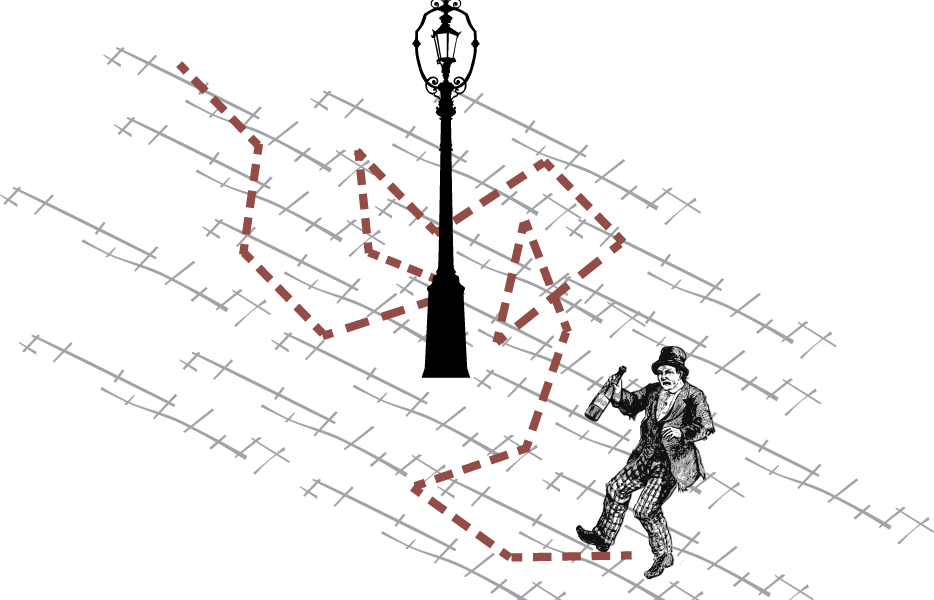

La idea del caminante aleatorio es que se mueva con una probabilidad hacia un lado y con otra probabilidad hacia otro. Es como un borracho en una dimensión. Siempre da pasos del mismo largo, pero está tan borracho que se mueve aleatoriamente hacia la izquierda y hacia la derecha, quizá con cierta motivación de moverse hacia uno de los lados, lo que le da una probabilidad mayor en esa dirección. Esto es justamente el problema del volado, pero en vez de que a águila le asociemos $0$, le asociamos $-1$. 

La pregunta es ¿Dónde se encontrará el borracho? Tendremos otras preguntas, pero esta primera es muy importante, porque nos va a dar idea sobre la difusión de caminantes aleatorios, que a su vez, los caminantes van a ser un buen modelo de muchos problemas físicos y de sistemas complejos. Un modelo aún sencillo, pero relativamente efectivo. 

Entonces, realmente estudiar el caminante aleatorio (al menos en 1D) y la distribución binomial, van de la mano. Más bien, son las preguntas que ahora pasamos a hacer la diferencia. A la pregunta "¿Dónde se encuentra el caminante?", tenemos 2 interpretaciones. La primera ya la respondimos, que es obtener al distribución de probabilidad. Claro, ahora no es $0$ y $1$, sino $-1$ y $1$, pero deben de parecerse mucho (luego vemos como transformar una distribución en la otra). La otra interpretación obtener el valor promedio donde se encuentran las partículas. Esto es el valor esperado.

Entonces, lo siguiente que estudiaremos será: 

- Primero el valor esperado de una variable aleatoria (discreta). De ahí ya de pasada veremos los diferentes "momentos" probabilísticos. 
- Modificar para que nuestra variable aleatoria no sea $0$ o $1$, sino $-1$ y $1$ o de forma más general $a$ y $b$. 
- Finalmente, estudiaremos las variables aleatorias en 2D, 3D y ND. Esto lo veremos como varias variables aleatorias "conjuntas". 

Con esto lograremos estudiar a profundidad la pregunta de ¿dónde se encuentra el caminante?, pero de paso también responderemos otras preguntas, como la probabilidad de que un caminante regrese, o que 2 caminantes con posición incial diferente se encuentren, etc. 